<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=9fbf12b8750024e4a4811b588854335fda84cdc1983ae7ad87053dd730cef4e4
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [2]:
import pandas as pd
from google.colab import drive 
drive = drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import export_graphviz
from IPython import display
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB.csv")

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [6]:
from keras.utils import to_categorical
train_target = to_categorical(train_target)
test_target = to_categorical(test_target)

In [16]:
model = Sequential()
 
model.add(Dense(64, activation='tanh', input_dim=1))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [17]:
model.compile(optimizer='adam', 
  loss='sparse_categorical_crossentropy', 
  metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                128       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 323
Trainable params: 323
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(
    train_features, train_target, batch_size=512, 
    epochs=4000, validation_split=0.2)
score = model.evaluate(test_features, test_target, batch_size=128)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/4000


ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt

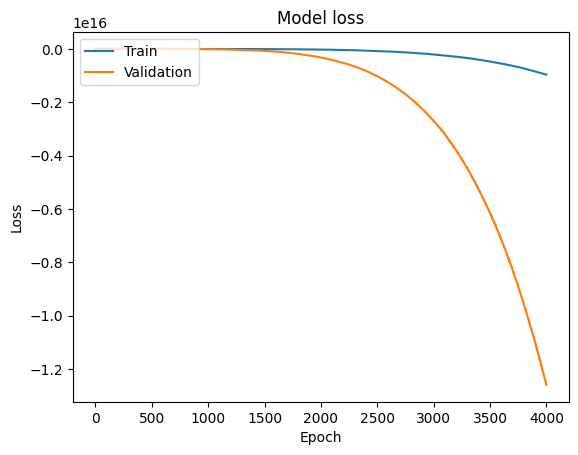

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
 
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
 
plt.show()

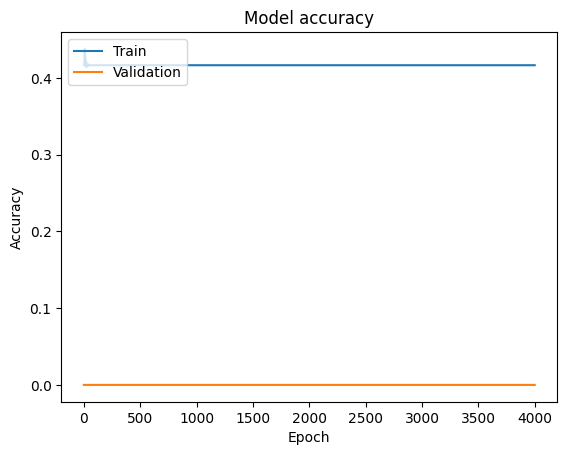

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
 
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
 
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_features, test_target['Number of Bugs'])

131/131 [==============================] - 1s 4ms/step - loss: -691592277000192.0000 - accuracy: 0.3178
